In [14]:
# Data analysis

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

#Read the data
train_df = pd.read_csv("train.csv")

#Display the first 5 rows
print(train_df.head(15))

    id       Name  Gender   Age           City  \
0    0   Aaradhya  Female  49.0       Ludhiana   
1    1      Vivan    Male  26.0       Varanasi   
2    2     Yuvraj    Male  33.0  Visakhapatnam   
3    3     Yuvraj    Male  22.0         Mumbai   
4    4       Rhea  Female  30.0         Kanpur   
5    5       Vani  Female  59.0      Ahmedabad   
6    6     Ritvik    Male  47.0          Thane   
7    7    Rajveer    Male  38.0         Nashik   
8    8  Aishwarya  Female  24.0      Bangalore   
9    9     Simran  Female  42.0          Patna   
10  10    Utkarsh    Male  55.0         Rajkot   
11  11     Aahana  Female  51.0          Patna   
12  12      Tejas    Male  39.0         Jaipur   
13  13     Aadhya  Female  29.0           Pune   
14  14      Kiran    Male  50.0          Thane   

   Working Professional or Student           Profession  Academic Pressure  \
0             Working Professional                 Chef                NaN   
1             Working Professional         

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     278

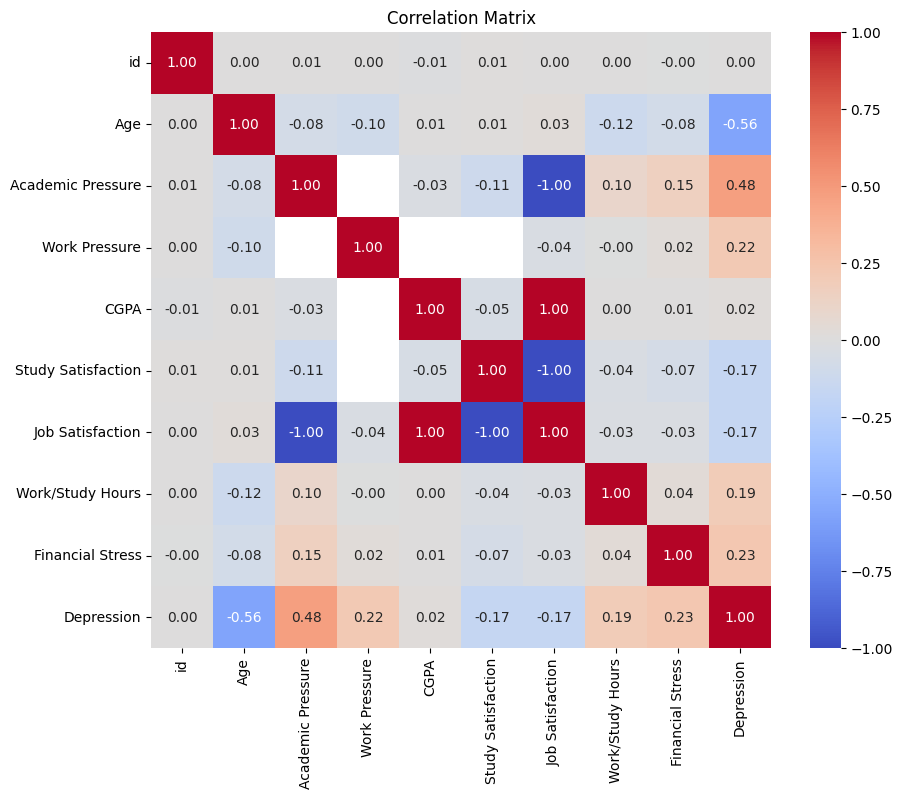

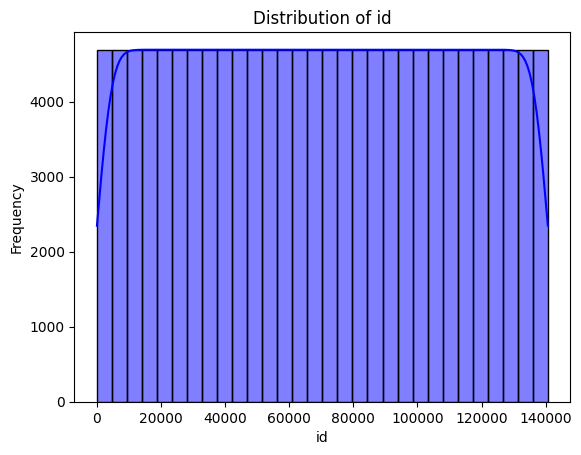

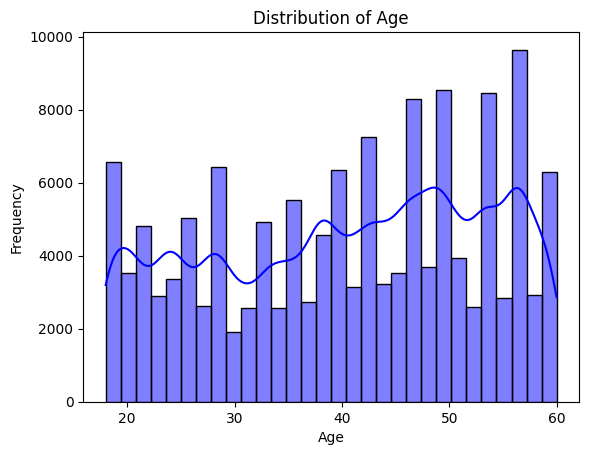

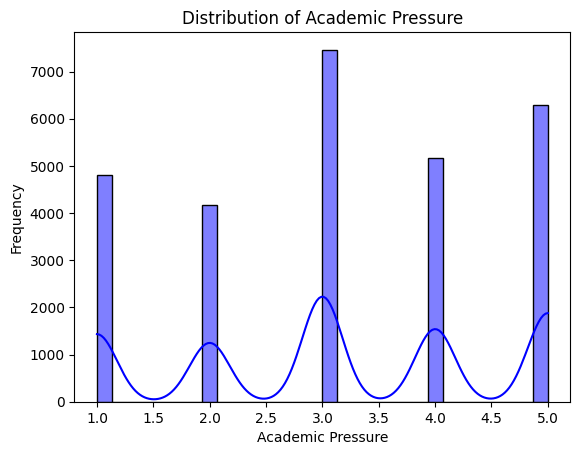

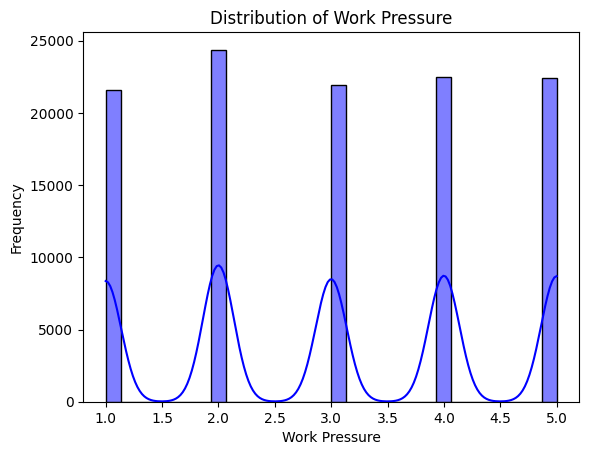

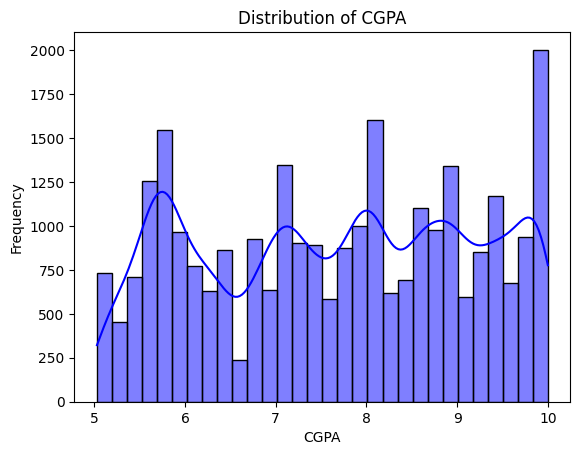

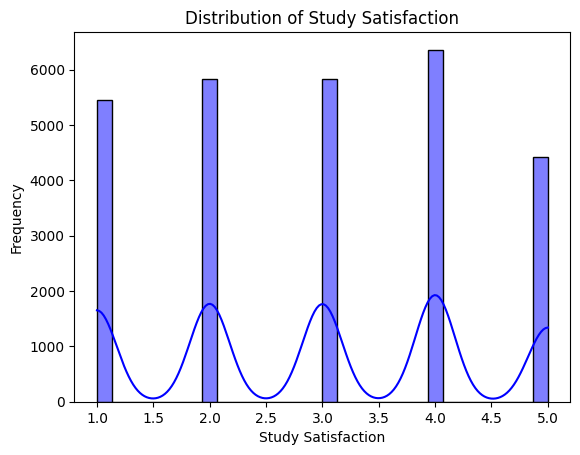

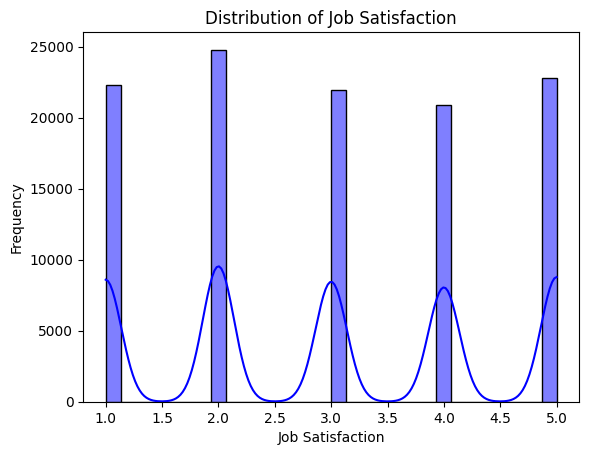

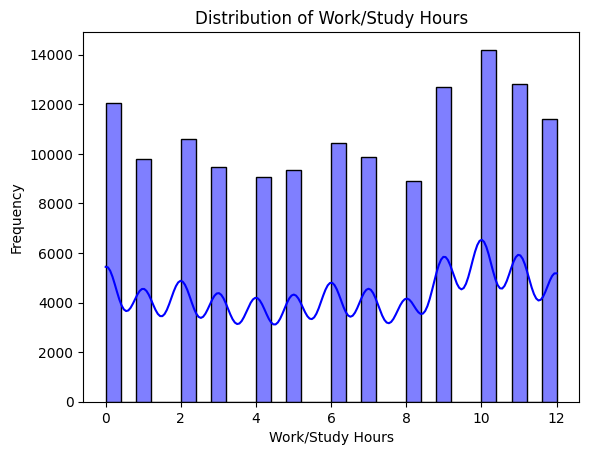

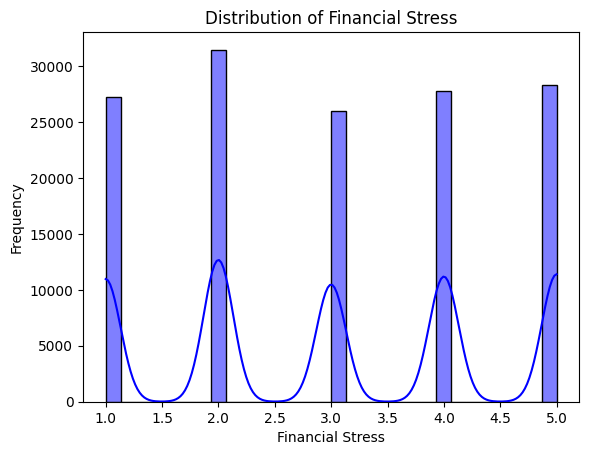

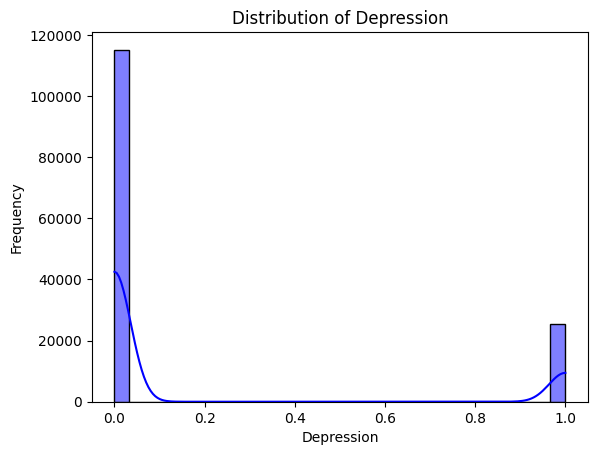

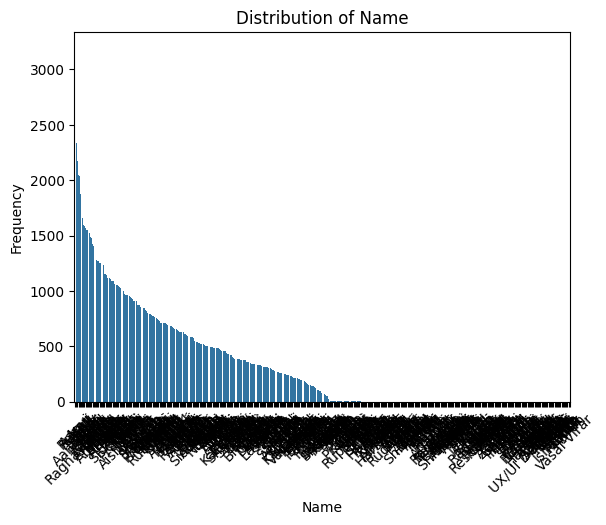

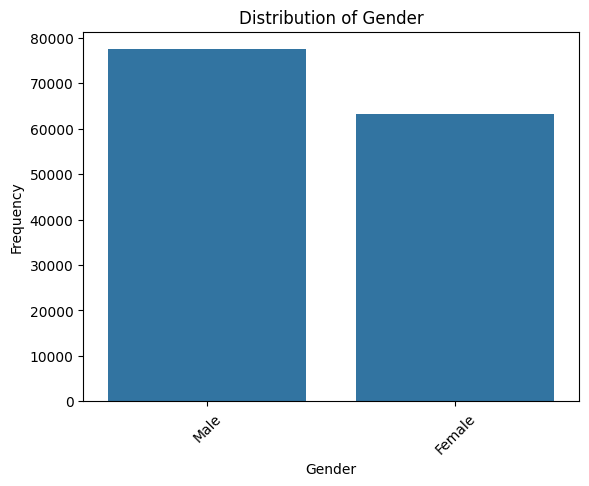

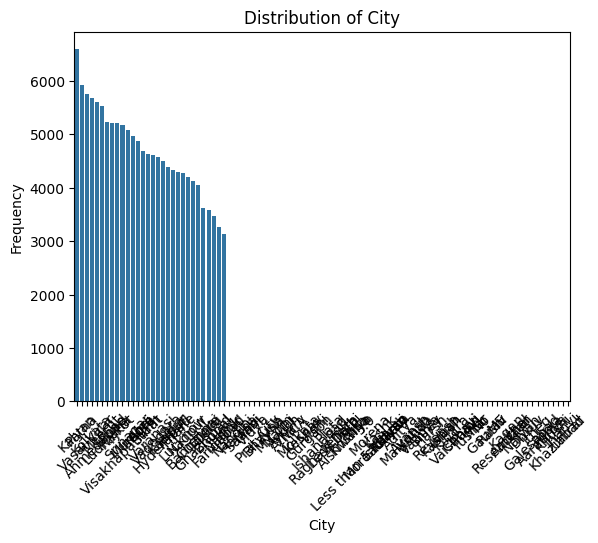

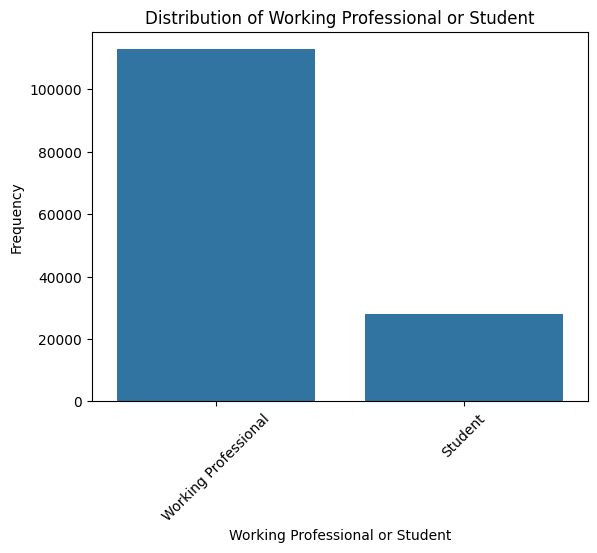

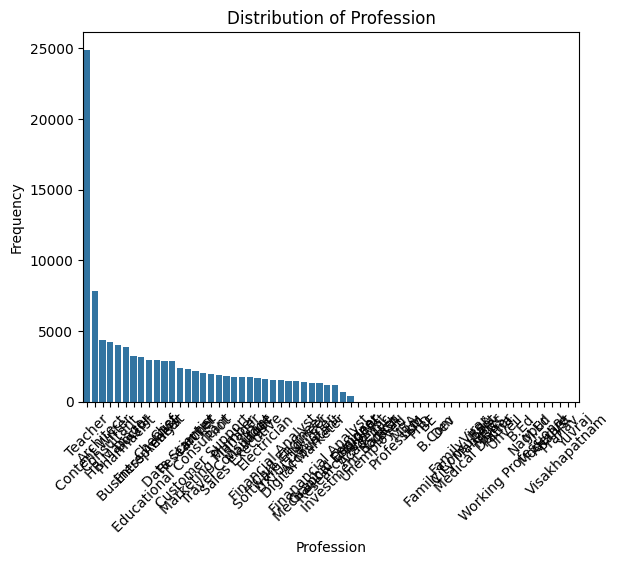

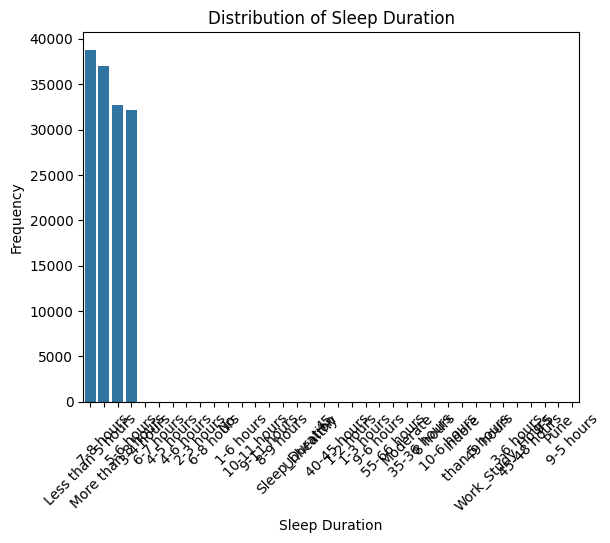

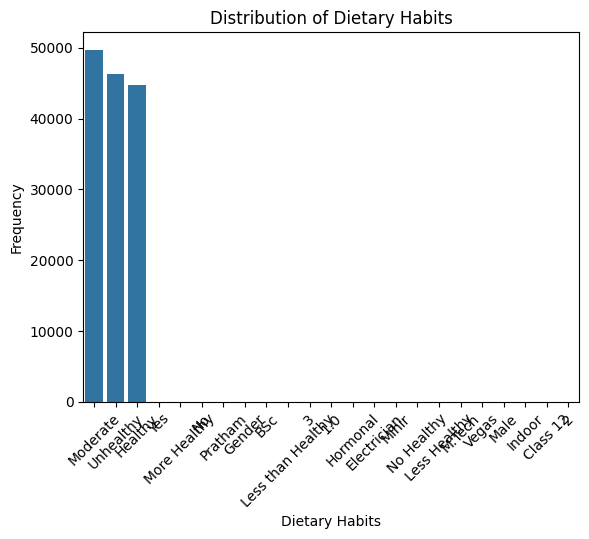

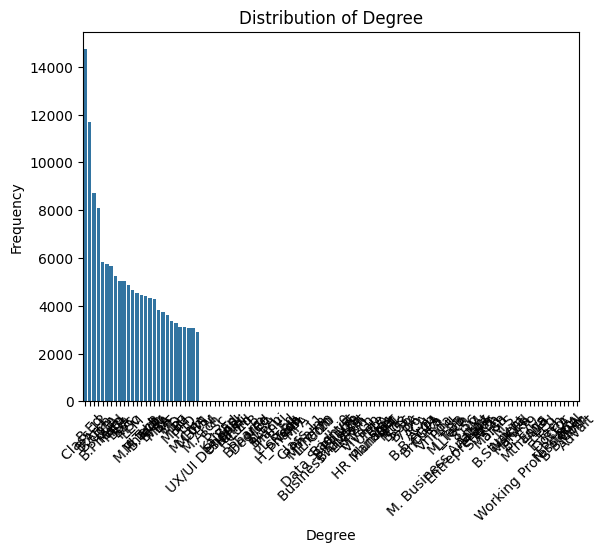

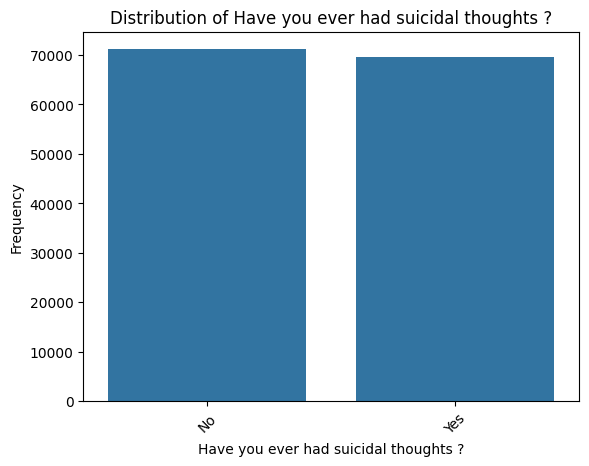

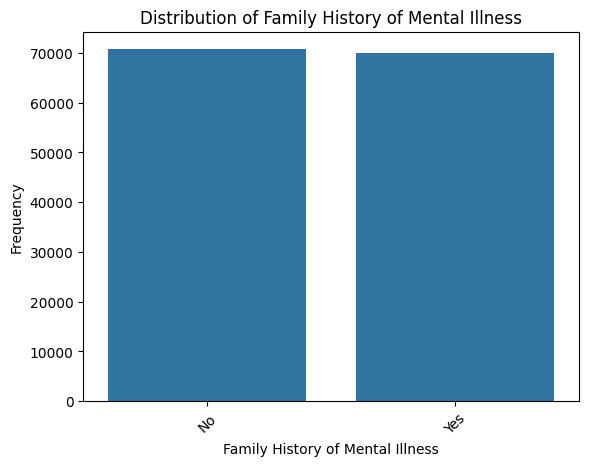


Number of duplicate rows: 0


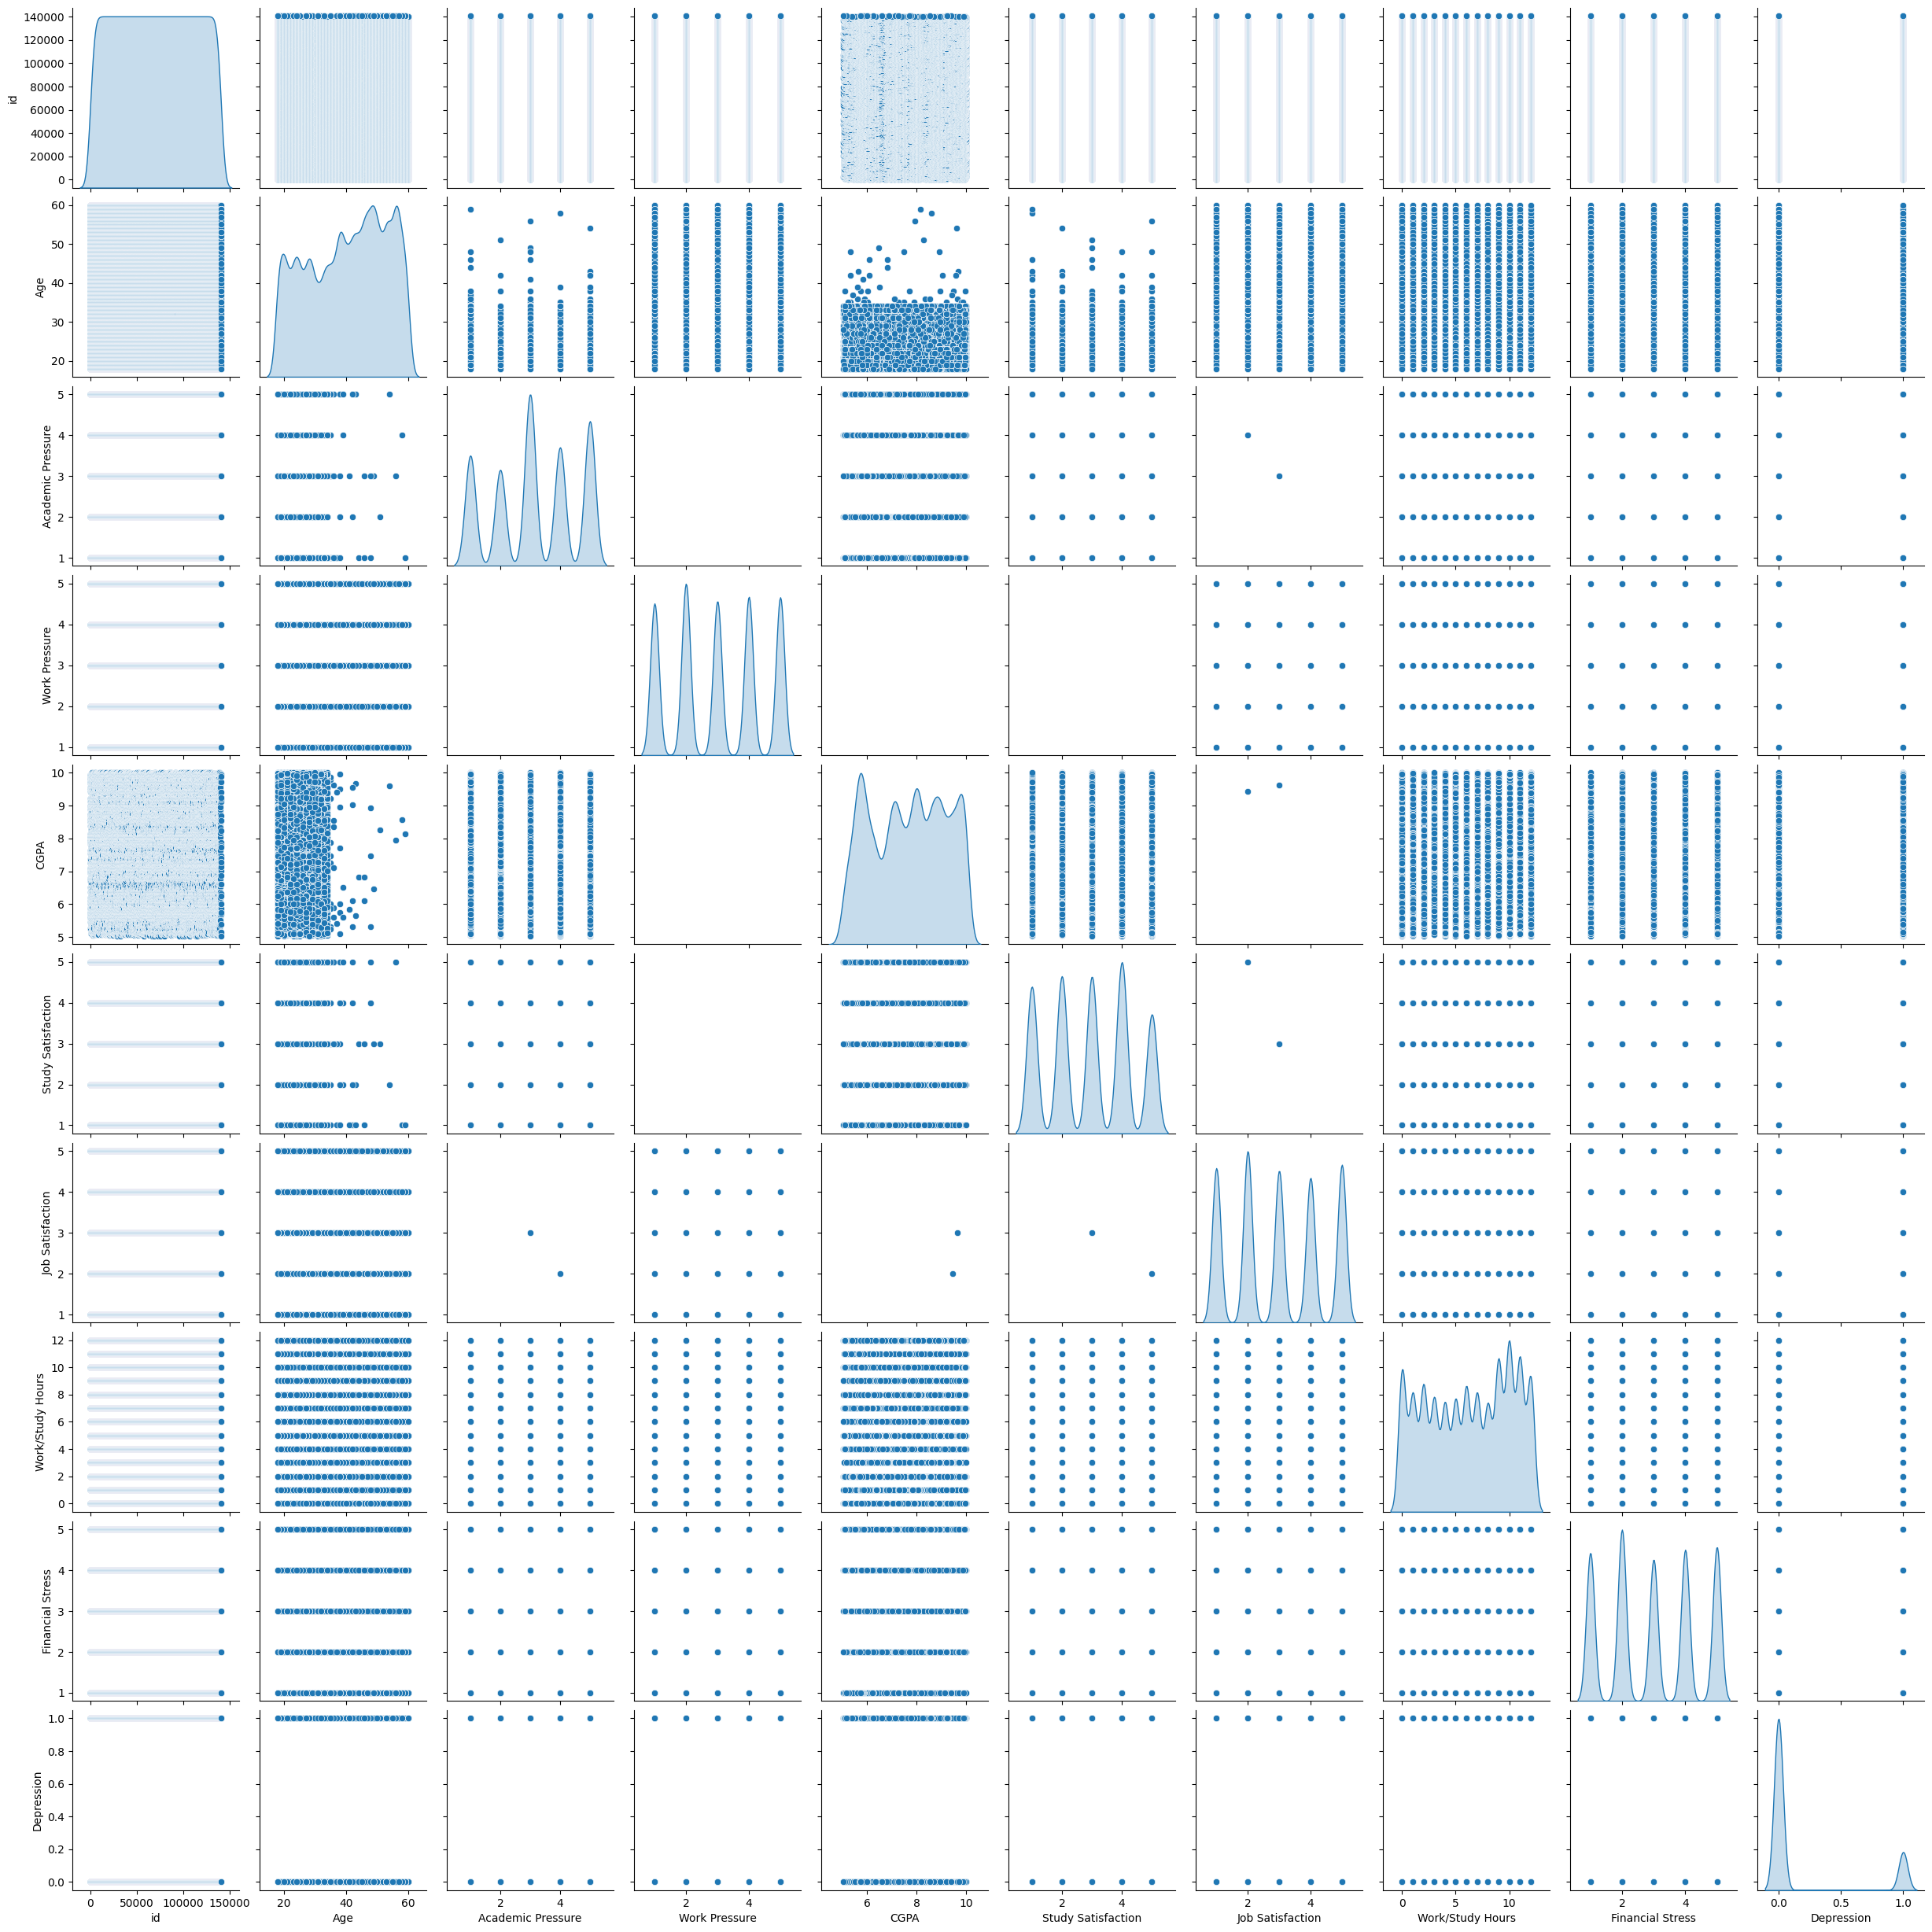

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
train_df.info()

# Check for missing values
print("\nMissing Values:")
print(train_df.isnull().sum())

# Display basic statistics for numerical columns
print("\nDescriptive Statistics:")
print(train_df.describe())

# Check the distribution of target variable (if applicable)
if 'target' in train_df.columns:
    print("\nTarget Variable Distribution:")
    sns.countplot(x='target', data=train_df)
    plt.title("Distribution of Target Variable")
    plt.show()

# Check correlation between numerical features
# Filter for numerical columns only
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = train_df[numerical_cols].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Visualize distribution of numerical features
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure()
    sns.histplot(train_df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Visualize relationships between features and target variable
if 'target' in train_df.columns:
    for col in numerical_cols:
        if col != 'target':
            plt.figure()
            sns.boxplot(x='target', y=col, data=train_df)
            plt.title(f"Relationship between {col} and Target")
            plt.xlabel("Target")
            plt.ylabel(col)
            plt.show()

# Analyze categorical features (if any exist)
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# Check for duplicate rows
duplicates = train_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Display pair plots for a quick view of feature interactions (optional for small datasets)
if len(numerical_cols) <= 10:
    sns.pairplot(train_df, hue='target' if 'target' in train_df.columns else None, diag_kind='kde')
    plt.show()

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming train_df is your DataFrame

# Step 1: Identify columns with missing values
columns_with_missing = train_df.columns[train_df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing)

# Dictionary to store the imputed means/modes for each column and age
imputed_values = {}

# Step 2: Fill missing values in the 'Age' column with the mean age
if 'Age' in columns_with_missing:
    mean_age = train_df['Age'].mean()
    train_df['Age'].fillna(mean_age, inplace=True)

# Step 3: Handle missing values for other columns
for col in columns_with_missing:
    if col != 'Age':  # Skip 'Age' as it's already handled
        if train_df[col].dtype in ['float64', 'int64']:  # Numeric columns
            # Initialize a dictionary for each numeric column to store means by age
            age_means = {}
            for age in train_df['Age'].unique():
                mean_value = train_df[train_df['Age'] == age][col].mean()
                age_means[age] = mean_value
                # Fill the missing values for this age with the corresponding mean
                train_df.loc[(train_df['Age'] == age) & (train_df[col].isnull()), col] = mean_value
            # Store the imputed means for this column
            imputed_values[col] = {'means': age_means}
        else:  # Non-numeric columns
            # Initialize a dictionary for each non-numeric column to store modes by age
            age_modes = {}
            for age in train_df['Age'].unique():
                mode_value = train_df[train_df['Age'] == age][col].mode()[0]
                age_modes[age] = mode_value
                # Fill the missing values for this age with the corresponding mode
                train_df.loc[(train_df['Age'] == age) & (train_df[col].isnull()), col] = mode_value
            # Store the imputed modes for this column
            imputed_values[col] = {'modes': age_modes}

# Step 4: Verify missing values are imputed
print(train_df.isnull().sum())  # Check that missing values are imputed correctly

# Step 5: Save the imputed values for later reference
# You can save this dictionary to a file if needed
import json
with open('imputed_values.json', 'w') as f:
    json.dump(imputed_values, f)

print("Imputed values saved to 'imputed_values.json'")


Columns with missing values: ['Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Dietary Habits', 'Degree', 'Financial Stress']
id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                   0
Academic Pressure                        31124
Work Pressure                                0
CGPA                                     31124
Study Satisfaction                       31124
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               0
Degree                                       0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress     

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming train_df is your DataFrame

# Step 1: Identify non-numeric columns
non_numeric_cols = train_df.select_dtypes(include=['object']).columns

# Step 2: Initialize LabelEncoder
label_encoder = LabelEncoder()

# Step 3: Apply Label Encoding to each non-numeric column
for col in non_numeric_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col].astype(str))

# Step 4: Verify label encoding
print("Label Encoding for Non-Numeric Columns:")
print(train_df[non_numeric_cols].head())  # Preview the encoded columns

print(train_df.head(15))


Label Encoding for Non-Numeric Columns:
   Name  Gender  City  Working Professional or Student  Profession  \
0    11       0    50                                1          10   
1   407       1    93                                1          55   
2   417       1    97                                0          55   
3   417       1    64                                1          55   
4   286       0    37                                1           9   

   Sleep Duration  Dietary Habits  Degree  \
0              29               7      33   
1              27              20      63   
2              15               7      21   
3              27              15      28   
4              15              20      28   

   Have you ever had suicidal thoughts ?  Family History of Mental Illness  
0                                      0                                 0  
1                                      1                                 0  
2                                    

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib


# Define features and target variable for training
X = train_df.drop(columns=['id', 'Name', 'Gender', 'Depression'])  # Replace 'Depression' with your actual target column name
y = train_df['Depression']  # Replace 'Depression' with your actual target column name

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameters grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X, y)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Train the Random Forest model with the best parameters
best_rf = random_search.best_estimator_

# Save the trained model
joblib.dump(best_rf, 'best_random_forest_model.pkl')

print("Model saved as 'best_random_forest_model.pkl'")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\MINU\Projects\mental_health\Health\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
99 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "d:\MINU\Projects\mental_health\Health\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\MINU\Projects\mental_health\Health\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\MINU\Projects\mental_health\Health\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Model saved as 'best_random_forest_model.pkl'


In [2]:
import joblib
model = joblib.load('best_random_forest_model.pkl')
print(f"Type of the loaded model: {type(model)}")  # Should print RandomForestClassifier


Type of the loaded model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
